# `Table of Content`

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dict">Data Dictionary</a></li>
<li><a href="#eda"> Data Exploration/Cleaning</a></li>
<li><a href="#quest">Questions For Analysis</a></li>
</ul>

<a id='intro'></a>

## `INTRODUCTION`

> The dataset includes information about Uber trips documented in the year 2016. The primary objective of this analysis is to address inquiries and convey findings through visual representations.

<a id='dict'></a>

## `DATA DICTIONARY`



 - START_DATE*: The date and time at which the trip was started.

 - END_DATE*: The date and time at which the trip was ended.

- CATEGORY*: The category of the trip, such as "Business" or "Personal".

- START*: The starting location of the trip.

- STOP*: The ending location of the trip.

- MILES*: The distance covered during the trip in miles.

- TRAVEL_DURATION(MINS): The duration of the trip in minutes.

- HOUR: The hour at which the trip was started (e.g., 8 for 8:30 AM).

- TIME: The formatted time of the trip start (e.g., 08:30 AM).

- DAY_OF_MONTH: The day of the month when the trip was started (e.g., 9 for August 9).

- WEEKDAY: The day of the week when the trip was started (e.g., Monday).

- MONTH: The month when the trip was started (e.g., August).

- YEAR: The year when the trip was started.

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar


In [2]:
# setting grid style

sns.set(style = 'darkgrid')

In [3]:
# reading the data

df = pd.read_csv('Uber Drives - .csv')

<a id='eda'></a>

## `DATA EXPLORATION/CLEANING`

In [4]:
# first five rows

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.shape

(1156, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
tot = df.shape[0]

In [8]:
# percentage of null values

(df.isnull().sum()/tot *100).apply(lambda x : f"{x : .2f}%")

START_DATE*      0.00%
END_DATE*        0.09%
CATEGORY*        0.09%
START*           0.09%
STOP*            0.09%
MILES*           0.00%
PURPOSE*        43.51%
dtype: object

<AxesSubplot:>

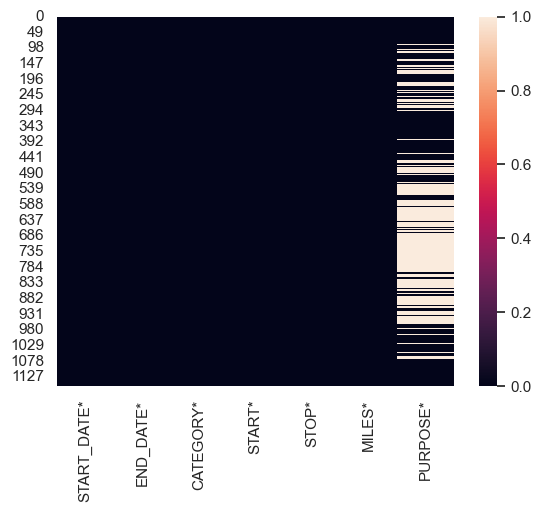

In [9]:
# Visualizing missing values

sns.heatmap(df.isnull())

since over 30% of the values are missing in the `Purpose` column, we would be dropping that column

In [10]:
# Thus dropping the purpose column

df.drop(labels = 'PURPOSE*', axis = 1, inplace = True)

In [11]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7


In [12]:
# checking for null values

df.isnull().sum()

START_DATE*    0
END_DATE*      1
CATEGORY*      1
START*         1
STOP*          1
MILES*         0
dtype: int64

In [13]:
#since the nan values are minute, we can drop them

df.dropna(inplace= True)

In [14]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
dtype: int64

In [15]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*'], dtype='object')

In [16]:
# converting start and end date to datetime datatype

df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],format="%m/%d/%Y %H:%M")

df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 63.2+ KB


In [18]:
# calculating the duration of travel

df['TRAVEL_DURATION(MINS)'] = (df['END_DATE*']- df['START_DATE*']).dt.total_seconds()/60

In [19]:
# Extracting hour, day, weekday and month from the `START DATE`

hour = []
clock = []
day= []
weekday= []
month = []
year = []

for i in df['START_DATE*']:
    hour.append(i.hour)
    clock.append(i.strftime('%I %p'))
    day.append(i.day)
    weekday.append(i.strftime('%A'))
    month.append(calendar.month_name[i.month])
    year.append(i.strftime('%Y'))
    
    
df['HOUR'] = hour
df['TIME'] = clock
df['DAY_OF_MONTH'] = day
df['WEEKDAY'] = weekday
df['MONTH'] = month
df['YEAR'] = year
    

In [20]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,TRAVEL_DURATION(MINS),HOUR,TIME,DAY_OF_MONTH,WEEKDAY,MONTH,YEAR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,6.0,21,09 PM,1,Friday,January,2016
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,12.0,1,01 AM,2,Saturday,January,2016
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,13.0,20,08 PM,2,Saturday,January,2016
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,14.0,17,05 PM,5,Tuesday,January,2016
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,67.0,14,02 PM,6,Wednesday,January,2016


In [21]:
# checking data types

df.dtypes

START_DATE*              datetime64[ns]
END_DATE*                datetime64[ns]
CATEGORY*                        object
START*                           object
STOP*                            object
MILES*                          float64
TRAVEL_DURATION(MINS)           float64
HOUR                              int64
TIME                             object
DAY_OF_MONTH                      int64
WEEKDAY                          object
MONTH                            object
YEAR                             object
dtype: object

In [22]:
# check for the number of years

df['YEAR'].unique()

array(['2016'], dtype=object)

<a id='quest'></a>

# `Question For Analysis`

##  `Average time taken to travel per day`

In [23]:
# Average time taken to travel per day
w_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

avg_day = round(df.groupby('WEEKDAY')['TRAVEL_DURATION(MINS)'].mean(),0)
avg_day = avg_day.reindex(w_order)

print(avg_day)

WEEKDAY
Sunday       22.0
Monday       20.0
Tuesday      22.0
Wednesday    21.0
Thursday     24.0
Friday       26.0
Saturday     27.0
Name: TRAVEL_DURATION(MINS), dtype: float64


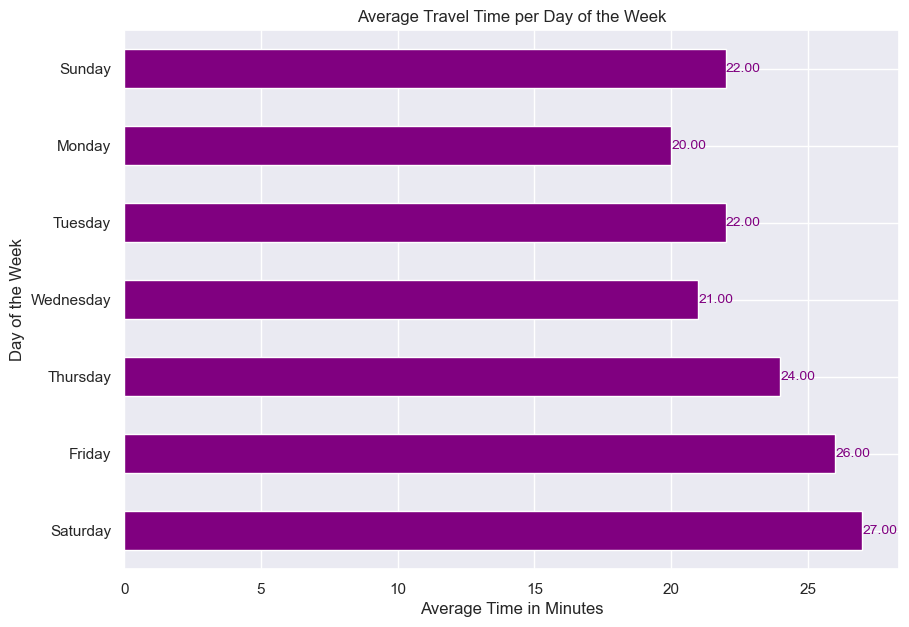

In [109]:
ax = avg_day[::-1].plot(kind = 'barh', color = 'purple', figsize = (10,7))


for index, value in enumerate(avg_day[::-1]):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='purple', fontsize=10)

# Add labels and title
plt.xlabel('Average Time in Minutes')
plt.ylabel('Day of the Week')
plt.title('Average Travel Time per Day of the Week')

# Display the plot
plt.show()

##  `What time of the day do people mostly take Uber `

In [49]:
# What time of the day do people mostly take Uber 
t_uber = df['TIME'].value_counts()
t_uber

03 PM    98
05 PM    95
01 PM    94
06 PM    94
02 PM    89
04 PM    88
12 PM    77
11 AM    72
08 PM    71
07 PM    68
10 AM    65
09 AM    51
09 PM    51
08 AM    35
10 PM    31
11 PM    26
12 AM    19
07 AM    13
01 AM     5
05 AM     4
06 AM     4
03 AM     3
02 AM     2
Name: TIME, dtype: int64

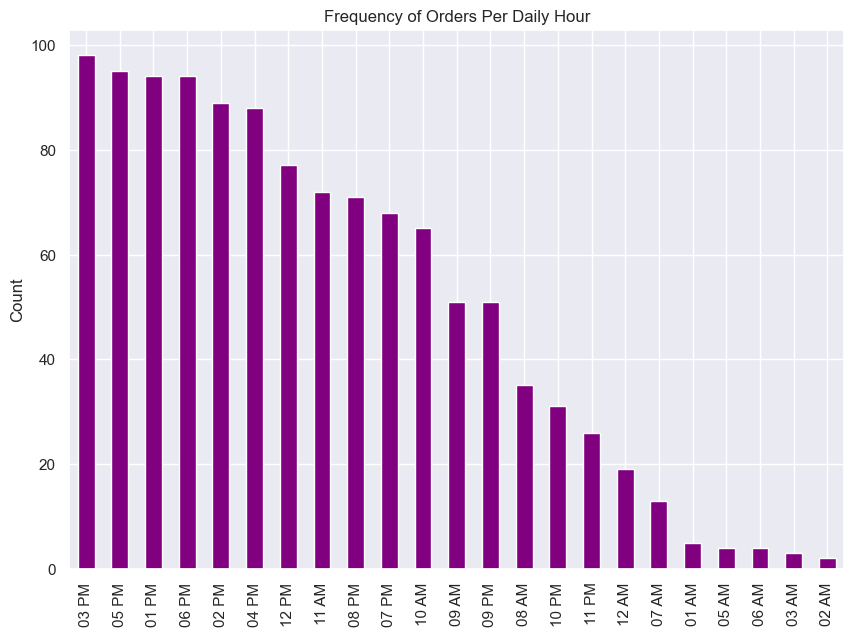

In [107]:
plt.figure(figsize = (10,7))

(df['TIME'].value_counts()).plot(kind = 'bar', color = 'purple')


# Add labels and title
plt.ylabel('Count')
plt.title('Frequency of Orders Per Daily Hour')

# Display the plot
plt.show()

##  `How far in miles do people travel the most`

<AxesSubplot:xlabel='MILES*', ylabel='Count'>

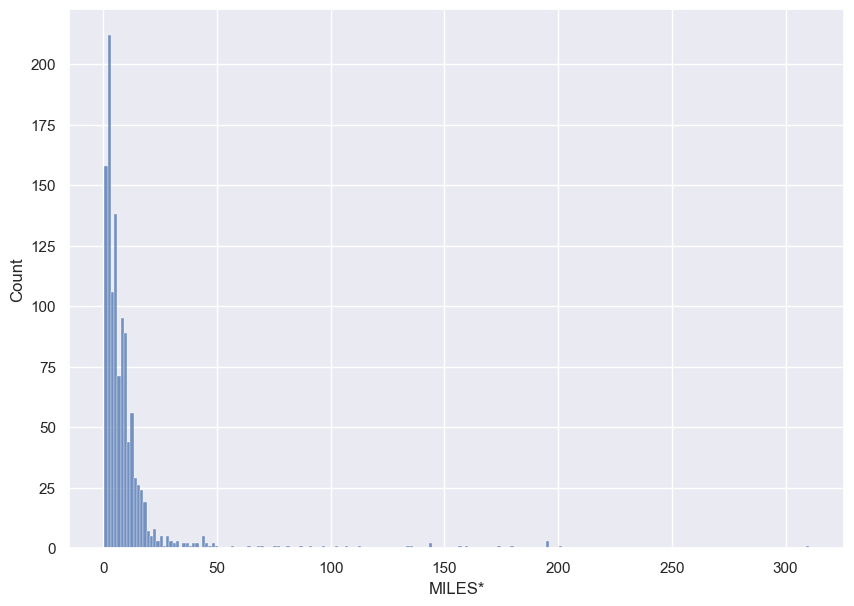

In [28]:
# Disribution of distance travelled 
plt.figure(figsize = (10,7))


sns.histplot(df['MILES*'], kde= False)


##  `Day of the week with the most Number of trips`

In [44]:

# Number of trips per day
num_trip = df['WEEKDAY'].value_counts()

# setting the order from Sunday to Saturday
num_trip = num_trip.reindex(w_order)

num_trip

Sunday       148
Monday       174
Tuesday      176
Wednesday    147
Thursday     154
Friday       206
Saturday     150
Name: WEEKDAY, dtype: int64

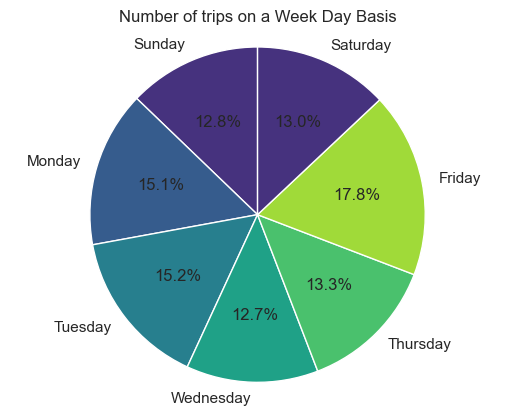

In [61]:
# plotting a pie to represent this

sns.set_palette('viridis')
plt.pie(num_trip, labels = num_trip.index, autopct = "%1.1f%%", startangle = 90)

plt.axis('equal')
plt.title('Number of trips on a Week Day Basis')

plt.show()

In [40]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,TRAVEL_DURATION(MINS),HOUR,TIME,DAY_OF_MONTH,WEEKDAY,MONTH,YEAR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,6.0,21,09 PM,1,Friday,January,2016
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,12.0,1,01 AM,2,Saturday,January,2016
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,13.0,20,08 PM,2,Saturday,January,2016
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,14.0,17,05 PM,5,Tuesday,January,2016
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,67.0,14,02 PM,6,Wednesday,January,2016


##  `Number of Trips per Month`

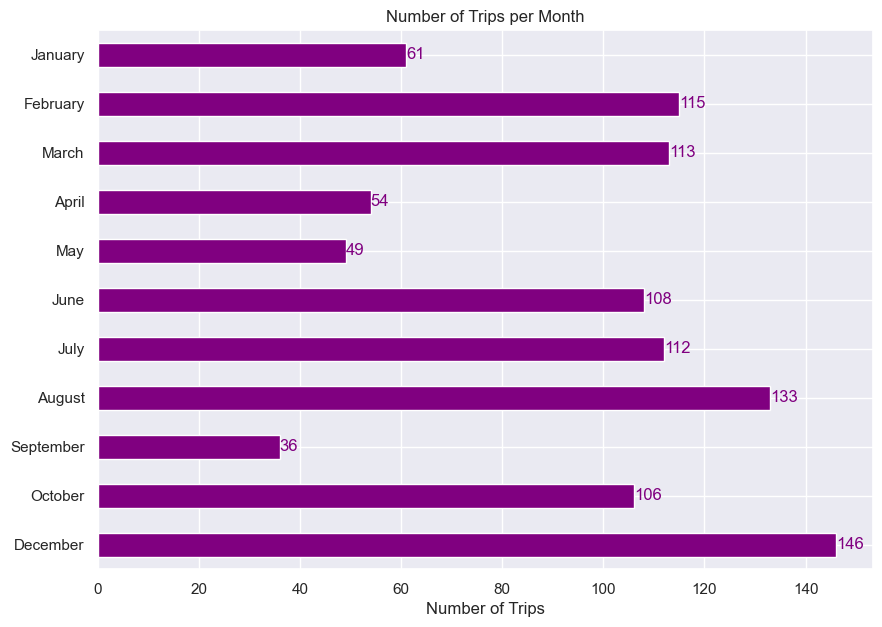

In [95]:
# Number of trips per month
m_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October','December']


num_month = df['MONTH'].value_counts()
num_month = num_month.reindex(m_order)

az = num_month[::-1].plot(kind = 'barh', color = 'purple', figsize = (10,7))

# labelling each bar
for index, value in enumerate(num_month.iloc[::-1]):
    az.text(value, index, f'{value:.0f}', ha='left', va='center', color='purple', fontsize=12)

plt.title('Number of Trips per Month')
plt.xlabel('Number of Trips')
plt.show()

##  `Top 10 Cities with the Highest Pickups`

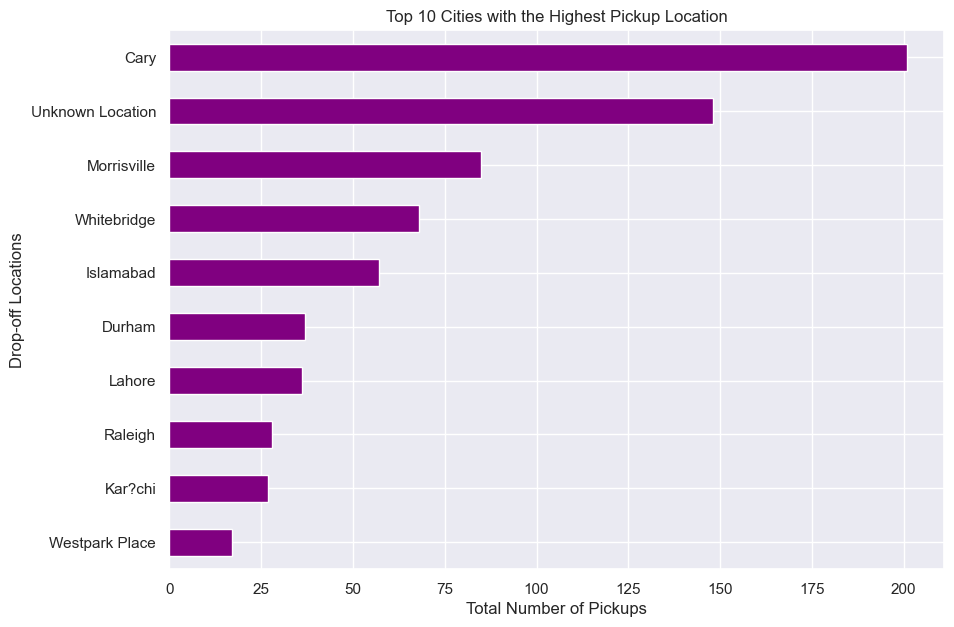

In [90]:
# Top 10 Cities with the highest pickup location

(df['START*'].value_counts().head(10))[::-1].plot(kind = 'barh', color = 'purple', figsize = (10,7))

plt.title('Top 10 Cities with the Highest Pickup Location')
plt.xlabel('Total Number of Pickups')
plt.ylabel('Drop-off Locations')
plt.show()

##  `Top 10 Cities with the Highest Stops`

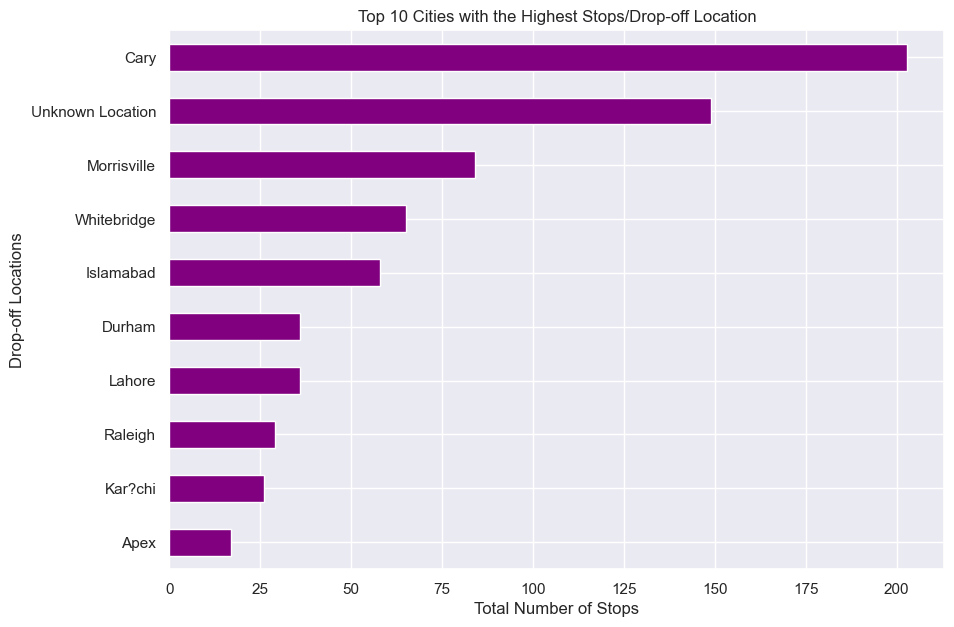

In [91]:
# Top 10 Cities with the Highest stop

(df['STOP*'].value_counts().head(10))[::-1].plot(kind = 'barh', color = 'purple', figsize = (10,7))

plt.title('Top 10 Cities with the Highest Stops/Drop-off Location')
plt.xlabel('Total Number of Stops')
plt.ylabel('Drop-off Locations')
plt.show()